<h1> A1: Predicting Car Price</h1>

In this assignment, I will solve a problem, i.e., Chaky company makes some car but he has difficulty setting the price for the car. I will make a simple web-based car price prediction system.

This is a regression problem trying to predict car price.

<ul>The followings describe the feautres:
<br></br>
<b>
<li>name
<li>year
<li>selling_price
<li>km_driven
<li>fuel
<li>seller_type
<li>transmission
<li>owner
<li>mileage
<li>engine
<li>max_power
<li>torque
<li>seats
</b>
</ul>

<h2> Task1. Preparing the datasets </h2>

<h3> 1. Importing Libraries </h3>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__, sns.__version__

('1.25.2', '2.0.3', '0.12.2', '3.7.2', '0.12.2')

<h3>1. Load Data</h3>

In [45]:
#read csv
df = pd.read_csv('/root/.vscode-server/data/lab1_Cars.csv')

In [46]:
#print the first row of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [47]:
#check the shape of the data
df.shape

(8128, 13)

In [48]:
#statistical info Hint:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [49]:
#check data types of the input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [50]:
#check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

<h3>2. Exploratory Data Analysis</h3>

EDA is an essential step to inspect the data, so to better understand nature of the given data.

<h4> Renaming </h4>

In [51]:
#Rename "Name" Column to "brand", I will not rename for the rest columns as it is already perfect.
df.rename (
    columns= {'name' : 'brand'}, inplace = True
)

In [52]:
#check the columns name
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

<h4> Label Encoding </h4>

Now I would like to change feature "owner" values to numerical values by mapping <b> First Owner = 1, ..., Test Drive Cars = 5

In [53]:
#check the owner column unique value
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [54]:
#import labelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['owner'] = le.fit_transform (df['owner'])
df['owner'].unique()

array([0, 2, 4, 1, 3])

<h4> Other Preparation </h4>

For feature "Fuel" >> I will remove all rows with 'CNG' and 'LPG'

In [78]:
df.shape

(8071, 12)

In [71]:
# Delete rows where 'fuel' == 'CNG'
# Using drop() to delete rows based on column value
df.drop(df[df['fuel'] == 'CNG'].index, inplace = True)

In [77]:
#check after dropping CNG
df.shape

(8071, 12)

In [79]:
# Delete rows where 'fuel' == 'LPG'
# Using drop() to delete rows based on column value
df.drop(df[df['fuel'] == 'LPG'].index, inplace = True)

In [80]:
#check after dropping LPG
df.shape

(8033, 12)

For feature 'mileage', I will remove 'kmpl' using df.mileage.str.split and 
convert column to numerical type (e.g. float)

In [104]:
#usage of split
# series.str.split (pad = None, *, n = -1, expand = flase, regex = None)

#df with split value of columns (set expand = True: it will return a df after splitted the values; n=1: total separations will be 1 time)
df1 = df["mileage"].str.split (" ",n = 1, expand = True)

#making the splitted 0 column as 'mileage' features
df['mileage'] = df1[0]

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.4,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.7,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.0,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.1,1298 CC,88.2 bhp,5.0


In [107]:
#check the datatype of a series
df['mileage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: object

In [121]:
#convert 'mileage' feature DType to float
df['mileage']=df['mileage'].astype('float64')

In [122]:
df['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: float64

For feature 'engine', I will remove 'CC' and convert it datatype to numerical (float) 

In [109]:
#check feature 'engine'
df['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8033, dtype: object

In [111]:
#remove CC of engine and put the results into temporary dataframe
df2 = df['engine'].str.split (' ', n = 1, expand = True)
df2

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [114]:
#update the value: update the resulted df[0] to the original df
df['engine']  = df2[0]

#check the df['engine']
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8033, dtype: object

In [117]:
#convert dtype of 'engin' to float
df['engine'] = df['engine'].astype('float64')

For feature 'maxpower', I will repeat the same steps as what I did to feature 'engine'

In [124]:
#check 'maxpower'
df['max_power']

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8033, dtype: object

In [125]:
#remove bhp
df3 = df['max_power'].str.split (" ", n = 1, expand = True)
df3

,0,1
0,74,bhp
1,103.52,bhp
2,78,bhp
3,90,bhp
4,88.2,bhp
...,...,...
8123,82.85,bhp
8124,110,bhp
8125,73.9,bhp
8126,70,bhp


In [127]:
#replace
df['max_power'] = df3[0]
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8033, dtype: object

In [128]:
#change dtype of max_power
df['max_power'] = df['max_power'].astype ("float64")
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8033, dtype: float64

For feature 'brand', I will take only the first word

In [132]:
#check
df['brand'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [134]:
#split
df4 = df['brand'].str.split (" ", n = 1, expand = True)
df4

,0,1
0,Maruti,Swift Dzire VDI
1,Skoda,Rapid 1.5 TDI Ambition
2,Honda,City 2017-2020 EXi
3,Hyundai,i20 Sportz Diesel
4,Maruti,Swift VXI BSIII
...,...,...
8123,Hyundai,i20 Magna
8124,Hyundai,Verna CRDi SX
8125,Maruti,Swift Dzire ZDi
8126,Tata,Indigo CR4


In [137]:
df['brand'] = df4[0]
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

I will remove some samples of which 'owner' == test driver car

In [141]:
df.shape

#check my df['owner'] sample to make sure it is correct or not
df[df['owner'] == 3]

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen,2019,1350000,5400,Diesel,Dealer,Manual,3,22.27,1498.0,108.60,5.0
4950,Audi,2019,6223000,7800,Petrol,Dealer,Automatic,3,15.26,1798.0,187.74,5.0
4951,Audi,2019,5923000,11500,Petrol,Dealer,Automatic,3,15.26,1798.0,187.74,5.0
4952,Audi,2019,6523000,23600,Petrol,Dealer,Automatic,3,15.26,1798.0,187.74,5.0
6220,Honda,2019,2000000,24857,Petrol,Dealer,Automatic,3,16.50,1799.0,139.46,5.0


In [142]:
#drop the samples for test drive car
df.drop(df[df['owner'] == 3].index, inplace = True)

In [146]:
#check the shape
df.shape

# df[df['owner'] == 3]

(8028, 12)

For 'sellingprice', I will transform using the log transform as it is a big number

In [151]:
#check selling_price
df['selling_price']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8028, dtype: int64

In [154]:
#log_transform for selling_price
df['selling_price'] = np.log(df['selling_price'])
df['selling_price']

0       2.566256
1       2.551105
2       2.482433
3       2.511537
4       2.466003
          ...   
8123    2.539716
8124    2.469203
8125    2.553591
8126    2.531920
8127    2.531920
Name: selling_price, Length: 8028, dtype: float64

In [155]:
#check the final dataframe
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,2.566256,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,Skoda,2014,2.551105,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,2.482433,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,5.0
3,Hyundai,2010,2.511537,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,Maruti,2007,2.466003,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,2.539716,110000,Petrol,Individual,Manual,0,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,2.469203,119000,Diesel,Individual,Manual,1,16.80,1493.0,110.00,5.0
8125,Maruti,2009,2.553591,120000,Diesel,Individual,Manual,0,19.30,1248.0,73.90,5.0
8126,Tata,2013,2.531920,25000,Diesel,Individual,Manual,0,23.57,1396.0,70.00,5.0


<h5>Univariate Analysis</h5>

Single variable exploratory data analysis

<Axes: xlabel='selling_price', ylabel='count'>

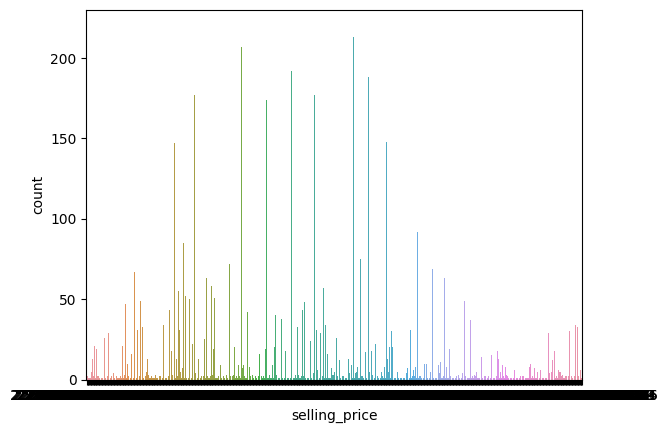

In [156]:
sns.countplot (data = df, x = 'selling_price')

<Axes: xlabel='year', ylabel='count'>

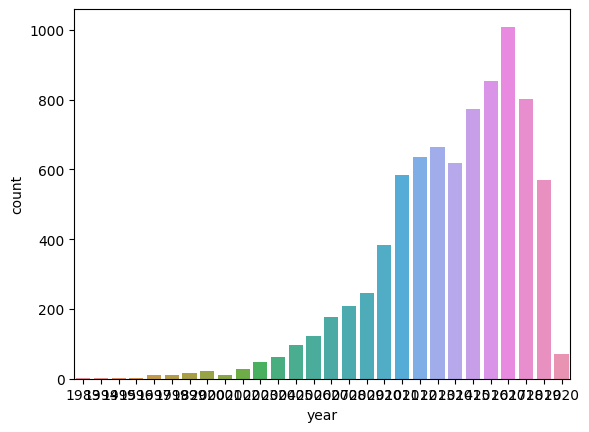

In [157]:
sns.countplot (data = df, x = 'year')

<H1> don't run </h1>

Drop the feature "torque"

In [85]:
#drop
df = df.drop (columns = ['torque'])

#check the columns
df.columns
